In [648]:
from manifold_learning import IMD, CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand
import importlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.integrate import solve_ivp
importlib.reload(IMD)
importlib.reload(utils)

<module 'manifold_learning.utils.utils' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/utils/utils.py'>

In [642]:
X = get_truncated_lorenz_rand(2000,100000)[None]
Y = X[:,:,[0]]

X_emb = utils.get_td_embedding_np(X[0,:,[2]].T,30,1).reshape(-1,30*1)

In [103]:
X = np.array([np.sin(np.linspace(0,200/((i+1)*0.1337),20000)) for i in range(5)]).sum(axis=0)[:,None]
X_emb = utils.get_td_embedding_np(X,5,30,return_pred=False)[:,:,0]
#X_emb = X_emb @ np.random.normal(0,1,(30,100))
X_emb = StandardScaler().fit_transform(X_emb)

In [2]:
X = np.array([get_truncated_lorenz_rand(280,n_steps=30000)[:,0] for i in range(5)])
X = X.T @ np.random.uniform(-1,1,(5,50))
X_emb = utils.get_td_embedding_np(X,15,10,return_pred=False)
X_emb = X_emb.reshape(X_emb.shape[0],-1)
X_emb = StandardScaler().fit_transform(X_emb)

In [646]:
trainer = IMD.IMD_nD(X_emb.shape[1], embed_dim=3, n_components=1,subtract_corr=False, device="cuda")

In [647]:
trainer.fit(X_emb, sample_len=1000, library_len=4000, 
            exclusion_rad=30, nbrs_num=50, tp=40, 
            epochs=1000, num_batches=1,optimizer="Adam", learning_rate=0.0001,tp_policy="range")


Epoch 1/1000, Loss: 0.0600
Epoch 2/1000, Loss: 0.0602
Epoch 3/1000, Loss: 0.0612
Epoch 4/1000, Loss: 0.0594
Epoch 5/1000, Loss: 0.0610
Epoch 6/1000, Loss: 0.0585
Epoch 7/1000, Loss: 0.0597
Epoch 8/1000, Loss: 0.0589
Epoch 9/1000, Loss: 0.0606
Epoch 10/1000, Loss: 0.0598
Epoch 11/1000, Loss: 0.0587
Epoch 12/1000, Loss: 0.0585
Epoch 13/1000, Loss: 0.0589
Epoch 14/1000, Loss: 0.0567
Epoch 15/1000, Loss: 0.0559
Epoch 16/1000, Loss: 0.0600
Epoch 17/1000, Loss: 0.0592
Epoch 18/1000, Loss: 0.0572
Epoch 19/1000, Loss: 0.0577
Epoch 20/1000, Loss: 0.0604
Epoch 21/1000, Loss: 0.0582
Epoch 22/1000, Loss: 0.0582
Epoch 23/1000, Loss: 0.0597
Epoch 24/1000, Loss: 0.0568
Epoch 25/1000, Loss: 0.0577
Epoch 26/1000, Loss: 0.0563
Epoch 27/1000, Loss: 0.0580
Epoch 28/1000, Loss: 0.0575
Epoch 29/1000, Loss: 0.0583
Epoch 30/1000, Loss: 0.0584
Epoch 31/1000, Loss: 0.0567
Epoch 32/1000, Loss: 0.0574
Epoch 33/1000, Loss: 0.0588
Epoch 34/1000, Loss: 0.0577
Epoch 35/1000, Loss: 0.0570
Epoch 36/1000, Loss: 0.0563
E

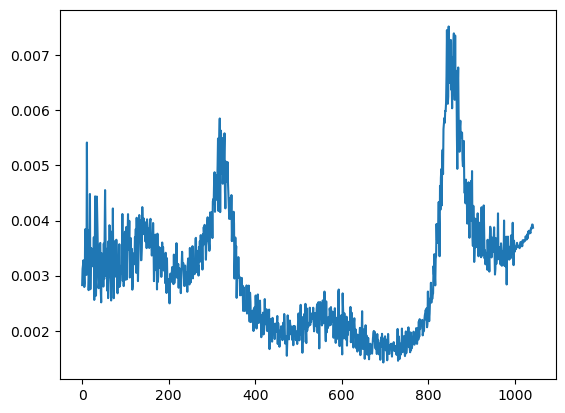

In [636]:
plt.plot(trainer.get_loss_history()[:])


In [620]:

unmixed = trainer.predict(X_emb)

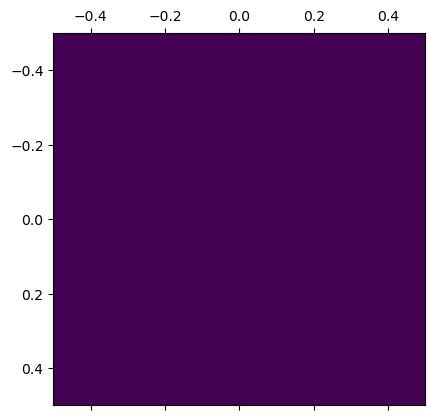

In [637]:
ccm = CCM.FastCCM(device="cpu")
plt.matshow(ccm.compute(np.transpose(unmixed,(1,0,2)), np.transpose(unmixed,(1,0,2)), 500, 150, 20, 10, 50).mean(axis=0))

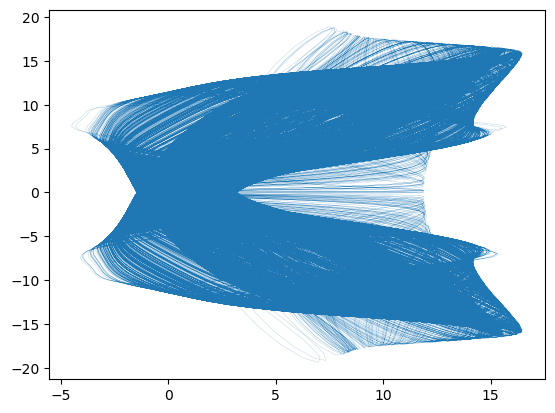

In [638]:
plt.plot(unmixed[:,0,0],Y[0,-99951:,0],linewidth=0.1)

In [639]:
ccm = CCM.FastCCM(device="cpu")
ccm.compute(unmixed[:,0][None],Y,20000,5000,30,15,0)

array([[[0.02712934]]], dtype=float32)

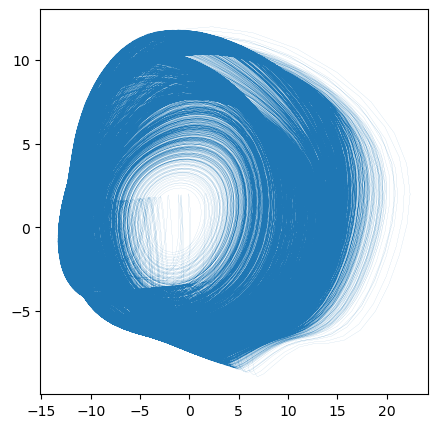

In [640]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=0.05)

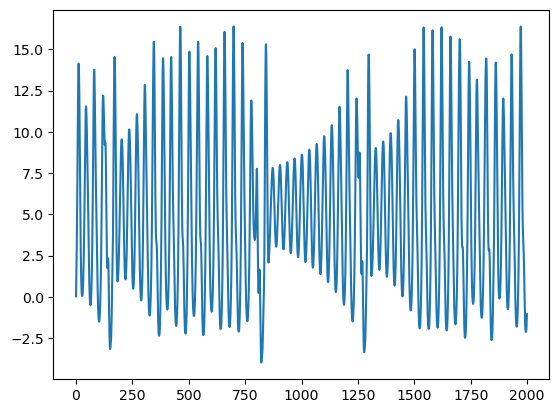

In [641]:
plt.plot(unmixed[:2000,0,0])

In [626]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,0,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()